In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### 1. Read the train Dataset.


In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### 2. Check missing values in df


In [4]:
s = df.isna().sum()
s

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.nunique()

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

In [6]:
X = df.drop(columns=['Type','Torque [Nm]','Rotational speed [rpm]','Process temperature [K]','Air temperature [K]','Machine failure'])
Y = df[['Machine failure']]

In [7]:
X.head()

,id,Product ID,Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,0,L50096,140,0,0,0,0,0
1,1,M20343,200,0,0,0,0,0
2,2,L49454,25,0,0,0,0,0
3,3,L53355,197,0,0,0,0,0
4,4,M24050,34,0,0,0,0,0


### 3. Seperate X and Y (Drop statistically insignificant)


In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Product ID']

In [10]:
con

['id', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

### 5. Create Sklearn pipeline for feature selection (Ordinal)


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [12]:
# Numeric pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

# Categorical Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal',OrdinalEncoder())])

# Combine cat and con pipelines
pre1 = ColumnTransformer([('num',num_pipe, con),
                          ('cat',cat_pipe, cat)])

In [13]:
X_pre = pre1.fit_transform(X)
X_pre

array([[-1.73203811e+00,  5.56416898e-01, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  2.75200000e+03],
       [-1.73201272e+00,  1.49443273e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  8.62000000e+03],
       [-1.73198733e+00, -1.24144677e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  2.34400000e+03],
       ...,
       [ 1.73198733e+00,  1.71330309e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  5.50200000e+03],
       [ 1.73201272e+00, -9.75675621e-01, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  5.02400000e+03],
       [ 1.73203811e+00,  1.94780704e+00, -3.94504785e-02, ...,
        -6.30383342e-02, -4.75677701e-02,  1.45300000e+03]])

In [14]:
cols = pre1.get_feature_names_out()
cols

array(['num__id', 'num__Tool wear [min]', 'num__TWF', 'num__HDF',
       'num__PWF', 'num__OSF', 'num__RNF', 'cat__Product ID'],
      dtype=object)

In [15]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__id,num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID
0,-1.732038,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2752.0
1,-1.732013,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,8620.0
2,-1.731987,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2344.0
3,-1.731962,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,4704.0
4,-1.731937,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,9727.0


### 6. Find Mutual Info Scores

In [16]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00016557, 0.00684339, 0.00727642, 0.02477858, 0.01119268,
       0.01922051, 0.0017094 , 0.01817588])

In [17]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__HDF                0.024779
num__OSF                0.019221
cat__Product ID         0.018176
num__PWF                0.011193
num__TWF                0.007276
num__Tool wear [min]    0.006843
num__RNF                0.001709
num__id                 0.000166
dtype: float64

<Axes: title={'center': 'Mutual Information Score'}>

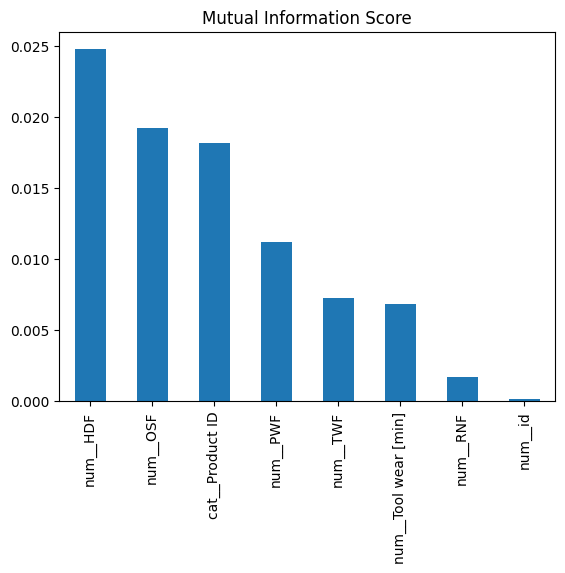

In [18]:
mi.plot(kind='bar',title='Mutual Information Score')

In [19]:
sel_cols = list(mi[0:7].index)
sel_cols

['num__HDF',
 'num__OSF',
 'cat__Product ID',
 'num__PWF',
 'num__TWF',
 'num__Tool wear [min]',
 'num__RNF']

In [20]:
# Approach 2 Seleect top n Features
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=7)
sel_features = sel.fit_transform(X_pre, Y)

In [21]:
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Product ID'], dtype=object)

In [22]:
sel_cols[0].split('__')[1]
sel_cols

array(['num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Product ID'], dtype=object)

In [23]:
sel_cols[0].split('__')[1]


'Tool wear [min]'

In [24]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [25]:
imp_cols

['Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Product ID']

In [26]:
X_sel = X[imp_cols]
X_sel

,Tool wear [min],TWF,HDF,PWF,OSF,RNF,Product ID
0,140,0,0,0,0,0,L50096
1,200,0,0,0,0,0,M20343
2,25,0,0,0,0,0,L49454
3,197,0,0,0,0,0,L53355
4,34,0,0,0,0,0,M24050
...,...,...,...,...,...,...,...
136424,210,0,0,0,0,0,M22284
136425,2,0,0,0,0,0,H38017
136426,214,0,0,0,0,0,L54690
136427,42,0,0,0,0,0,L53876


In [27]:
## Cat, Con for Selected Features
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [28]:
cat_sel

['Product ID']

In [29]:
con_sel

['Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']

### 7. Build the final sklearn pipeline (Onehotencoder)


In [30]:
from sklearn.preprocessing import OneHotEncoder

In [31]:
num_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num',num_pipe2, con_sel),
                          ('cat',cat_pipe2, cat_sel)])

In [32]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

<136429x9982 sparse matrix of type '<class 'numpy.float64'>'
	with 955003 stored elements in Compressed Sparse Row format>

In [33]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Tool wear [min]', 'num__TWF', 'num__HDF', ...,
       'cat__Product ID_M24855', 'cat__Product ID_M24857',
       'cat__Product ID_M24859'], dtype=object)

### train test spilt

In [34]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

### Create a final model for Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(random_state=21)

In [36]:
# Check accuracy in training
gbc.score(xtrain, ytrain)

0.9964267062477666

In [37]:
# Check accuracy in testing 
gbc.score(xtest, ytest)

0.9954555449681155

### Hyperparameter tuning

In [38]:
params ={'learning_rate' :[0.01, 0.05, 0.1, 0.2],
         'max_depth':[2,3,4,5,6,7,8],
         'min_samples_split':[2,3,4,5,6,7,8,9,10]}

In [39]:
from sklearn.model_selection import RandomizedSearchCV
base_gbc = GradientBoostingClassifier(random_state=21)
rscv = RandomizedSearchCV(base_gbc, param_distributions=params, cv=5, scoring='f1',random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=21),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]},
                   random_state=21, scoring='f1')

In [40]:
rscv.best_params_

{'min_samples_split': 6, 'max_depth': 6, 'learning_rate': 0.2}

In [41]:
rscv.best_score_

0.8545596927119312

In [42]:
best_gbc = rscv.best_estimator_

### Evaluate the model

In [43]:
best_gbc.score(xtrain,ytrain)

0.9964908422894735

In [44]:
best_gbc.score(xtest,ytest)

0.9954921937990178

### Predict train test data

In [46]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [47]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [48]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [49]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [50]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


### Confusion Matrix

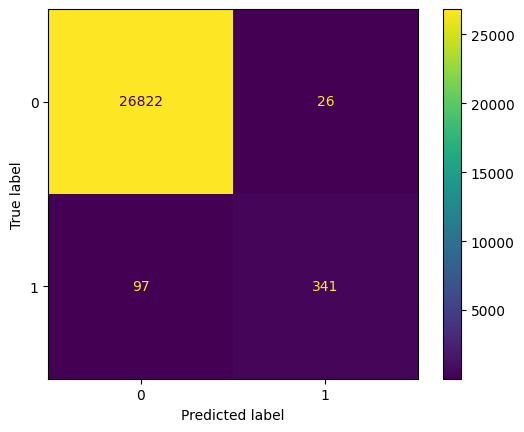

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_gbc.classes_)
cfd.plot()

### Classification report

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.93      0.78      0.85       438

    accuracy                           1.00     27286
   macro avg       0.96      0.89      0.92     27286
weighted avg       1.00      1.00      1.00     27286



### Print Classification report on test data

In [69]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.93      0.78      0.85       438

    accuracy                           1.00     27286
   macro avg       0.96      0.89      0.92     27286
weighted avg       1.00      1.00      1.00     27286



### Calculate ROC - AUC Score

In [71]:
yprob_tr = best_gbc.predict_proba(xtrain)[:,1]
yprob_ts = best_gbc.predict_proba(xtest)[:,1]

In [72]:
yprob_tr[0:5]

array([0.0029404, 0.0029404, 0.0029404, 0.0029404, 0.0029404])

In [73]:
yprob_ts[0:5]

array([0.99917117, 0.0029404 , 0.0029404 , 0.0029404 , 0.0029404 ])

In [74]:
## Check roc_auc score in training
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.9108805716692296

In [75]:
## Check roc auc score in testing
roc_auc_score(ytest, yprob_ts)

0.893947654238847

### Plot the ROC - AUC Score

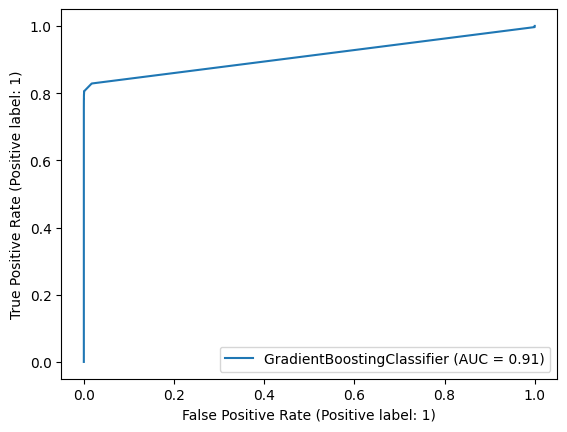

In [76]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_gbc,xtrain,ytrain)

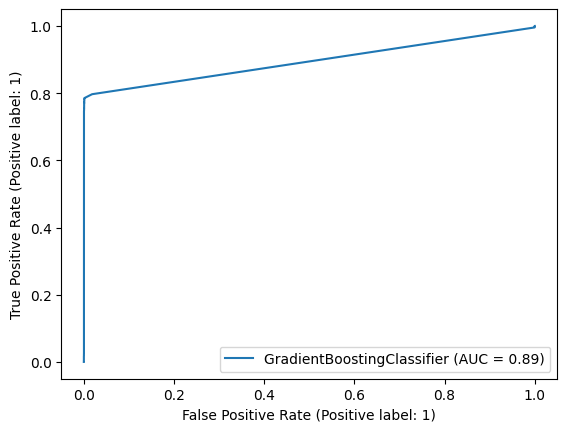

In [77]:
RocCurveDisplay.from_estimator(best_gbc, xtest, ytest)

### Select model for final predections

### Perform predections on test.csv

In [78]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [79]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [80]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [81]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

MemoryError: Unable to allocate 6.76 GiB for an array with shape (90954, 9982) and data type float64

In [57]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Product ID_H29424,cat__Product ID_H29425,cat__Product ID_H29432,cat__Product ID_H29434,...,cat__Product ID_M24827,cat__Product ID_M24835,cat__Product ID_M24842,cat__Product ID_M24846,cat__Product ID_M24847,cat__Product ID_M24849,cat__Product ID_M24851,cat__Product ID_M24855,cat__Product ID_M24857,cat__Product ID_M24859
0,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,-1.397783,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90950,-1.147645,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90951,1.291196,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90952,-0.553568,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### perform predctions

In [82]:
pred = best_gbc.predict(xnew_pre)
pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [59]:
prob = best_gbc.predict_proba(xnew_pre)[:,1]
prob

array([0.0029404, 0.0029404, 0.0029404, ..., 0.0029404, 0.0029404,
       0.0029404])

### Save results in Dataframe

In [83]:
df_results = xnew[['id']]
df_results

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [84]:
df_results['Machine failure']=pred
df_results['Probability']=prob

In [85]:
df_results

,id,Machine failure,Probability
0,136429,0,0.00294
1,136430,0,0.00294
2,136431,0,0.00294
3,136432,0,0.00294
4,136433,0,0.00294
...,...,...,...
90949,227378,0,0.00294
90950,227379,0,0.00294
90951,227380,0,0.00294
90952,227381,0,0.00294


In [86]:
df_results['Machine failure'].value_counts()

Machine failure
0    89781
1     1173
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

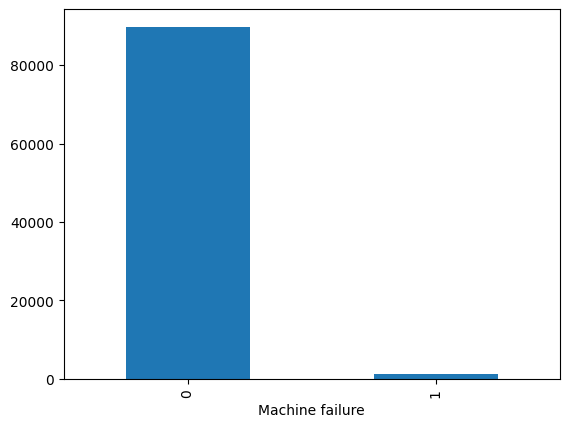

In [67]:
df_results['Machine failure'].value_counts().plot(kind='bar')

In [87]:
df_results.to_csv('Predections.csv',index=False)